# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from sklearn.linear_model import LogisticRegression

In [115]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [38]:
# frequency table for prestige and whether or not someone was admitted


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116359d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116482f90>]], dtype=object)

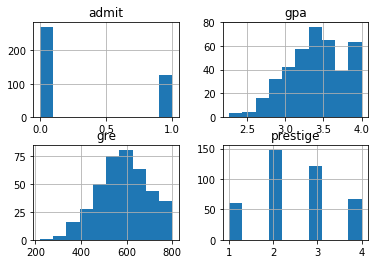

In [116]:
df.hist()

In [117]:
print pd.crosstab(df['prestige'],df['admit'])

admit      0   1
prestige        
1.0       28  33
2.0       95  53
3.0       93  28
4.0       55  12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [118]:

df = pd.get_dummies(df, columns=['prestige']) 
df.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: We would need 5 class variables. These would be gre, gpa, prestige 2.0, prestige 3.0 and prestige 4.0.

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [119]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted

handCalc=pd.crosstab(df['prestige_1.0'],df['admit'],)
print handCalc

admit           0   1
prestige_1.0         
0             243  93
1              28  33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [120]:
prob1=float(handCalc.ix[1,1])/float(sum(handCalc.ix[1,:]))
odds=prob1/(1-prob1)
print odds

1.17857142857


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [121]:
probs2=float(handCalc.ix[0,1])/float(sum(handCalc.ix[0,:]))
odds2=probs2/(1-probs2)
print odds2

0.382716049383


#### 3.3 Calculate the odds ratio

In [122]:

ab=float(handCalc.ix[1,1])/float(handCalc.ix[1,0])
cd=float(handCalc.ix[0,1])/float(handCalc.ix[0,0])
oddsratio=ab/float(cd)
print ab
print cd
print oddsratio

1.17857142857
0.382716049383
3.07949308756


#### 3.4 Write this finding in a sentenance: 

Answer:    
In statistics, the odds ratio is one of three main ways to quantify how strongly the presence or absence of property A is associated with the presence or absence of property B in a given population. 

If the Odds Ratio is greater than 1, then having "A" is considered to be "associated" with having "B" in the sense that the having of "B" raises (relative to not-having "B") the odds of having "A". Note that this does not establish that B is a contributing cause of "A": it could be that the association is due to a third property, "C", which is a contributing cause of both "A" and "B" (confounding). The odds ratio compares the occurrence of the outcome in the presence of a particular exposure, with the occurrence of the outcome in the absence of a particular exposure.


In a more technical language, the OR is a measure of effect size, describing the strength of association or non-independence between two binary data values. It is used as a descriptive statistic, and plays an important role in logistic regression.   

Given that for Prestige 1 we see an odds ratio greater than 1 for admitance, we can conclude that the presence of Prestige 1 enhances the odds of being admitted.

#### 3.5 Print the cross tab for prestige_4

In [123]:

handCalc4=pd.crosstab(df['prestige_4.0'],df['admit'],)
print handCalc4

admit           0    1
prestige_4.0          
0             216  114
1              55   12


#### 3.6 Calculate the OR 

In [124]:

ab4=float(handCalc4.ix[1,1])/float(handCalc4.ix[1,0])
cd4=float(handCalc4.ix[0,1])/float(handCalc4.ix[0,0])
oddsratio4=ab4/float(cd4)
print ab4
print cd4
print oddsratio4

0.218181818182
0.527777777778
0.413397129187


#### 3.7 Write this finding in a sentence

Answer:   
As the odds ratio for Prestige 4 is less 1 for admitance, then we can say that the presence of Prestige 4 does not improve the odds of being admitted.

## Part 4. Analysis

In [125]:
# create a clean data frame for the regression
data =df.drop('prestige_1.0',axis=1)

print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [126]:
# manually add the intercept
data['intercept'] = 1.0
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept
0,0,380.0,3.61,0,1,0,1.0
1,1,660.0,3.67,0,1,0,1.0
2,1,800.0,4.00,0,0,0,1.0
3,1,640.0,3.19,0,0,1,1.0
4,0,520.0,2.93,0,0,1,1.0


#### 4.1 Set the covariates to a variable called train_cols

In [128]:
train_cols = ['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0', 'intercept']




#### 4.2 Fit the model

In [129]:



logit = sm.Logit(data['admit'], data[train_cols])


result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [130]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Mon, 22 May 2017   Pseudo R-squ.:                 0.08166
Time:                        21:30:03   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [131]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


As none of the Odds Ratio at the 97.5%  confidence intervals overlap with an odds ratio of 1, we can conclude that all variables are statistically significant.

#### 4.5 Interpret the OR of Prestige_2

Answer:    
As the Odds Ratio of Prestige_2 is less than 1, then the presence of Prestige_2 does not improve the odds of admitance. 

#### 4.6 Interpret the OR of GPA

Answer:    
As the Odds Ratio of GPA is greater than 1, then the presence of a higher GPA will improve the odds of being admitted. 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [200]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [201]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [202]:

combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
combos = pd.get_dummies(combos, columns=['prestige'], prefix='prestige',drop_first=True)

#### 5.2 Make predictions on the enumerated dataset

In [203]:


combos['admit_pred'] = result.predict(combos)

print combos.tail(4)


       gre  gpa  intercept  prestige_2.0  prestige_3.0  prestige_4.0  \
396  800.0  4.0        1.0             0             0             0   
397  800.0  4.0        1.0             1             0             0   
398  800.0  4.0        1.0             0             1             0   
399  800.0  4.0        1.0             0             0             1   

     admit_pred  
396    0.985399  
397    0.946509  
398    0.934534  
399    0.582995  


#### 5.3 Interpret findings for the last 4 observations

Answer:    

By observing the last 4 observations, we can see that the prestige of the school impacts the predicted admittance probability. Students from schools with different prestiges but same gpa and gre scores have different probabilities of being admitted. We expect that student from schools with higher prestige ranks will have higher odds of being admitted.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

In [191]:
import seaborn as sns

combos.head()

,gre,gpa,intercept,prestige_2.0,prestige_3.0,prestige_4.0,admit_pred
0,220.0,2.260000,1.0,0,0,0,0.827672
1,220.0,2.260000,1.0,1,0,0,0.557380
2,220.0,2.260000,1.0,0,1,0,0.503951
3,220.0,2.260000,1.0,0,0,1,0.090492
4,220.0,2.453333,1.0,0,0,0,0.848114


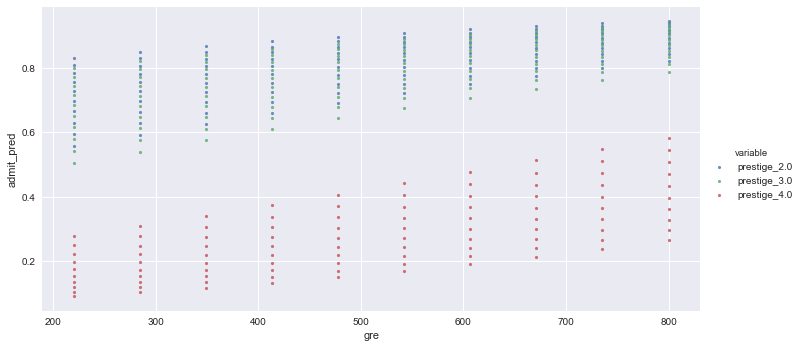

In [204]:

combos = pd.melt(combos, id_vars=['gre', 'gpa','admit_pred'],
    value_vars=[c for c in combos.columns if c.startswith('prestige')])
combos = combos[combos.value==1]

sns.lmplot('gre', 'admit_pred', 
           data=combos, size=5, aspect=2,
           fit_reg=False, hue='variable',
           scatter_kws={'s': 10, 'marker': '.'})

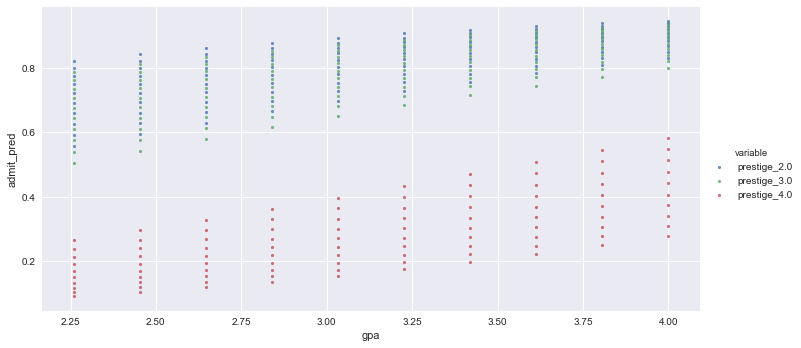

In [205]:
sns.lmplot('gpa', 'admit_pred', 
           data=combos, size=5, aspect=2,
           fit_reg=False, hue='variable',
           scatter_kws={'s': 10, 'marker': '.'})